## ESG Scoring system

In [6]:
import pandas as pd
import numpy as np

# Assuming the data is saved in a file named "company_data.csv"
df = pd.read_csv("./data/esg_scores.csv")

# Set the weight for each ESG category
weights = {
    'E': 0.5,  # Environmental (E) contributes 50%
    'S': 0.3,  # Social (S) contributes 30%
    'G': 0.2   # Governance (G) contributes 20%
}

# Define categorized metrics
environmental_metrics = [
    "Greenhouse Gas Emissions('GHG')",
    "Energy Consumption(GJ)",
    "Water Consumption",
    "Waste Generation"
]

social_metrics = [
    "Age-Based Diversity(existing employees by age group)",
    "Development & Training",
    "Employment",
    "Gender Diversity",
    "Occupational Health & Safety"
]

governance_metrics = [
    "Alignment with Frameworks And Disclosure Practices",
    "Assurance of Sustainability Report",
    "Board Composition",
    "ESG-related Certifications",
    "Economic Performance",
    "Ethical Behaviour(anti-corruption)",
    "Management Diversity"
]



# Classification function
def classify_metrics(label):
    if label in environmental_metrics:
        return 'E'
    elif label in social_metrics:
        return 'S'
    elif label in governance_metrics:
        return 'G'
    else:
        return 'Unknown'

# Classify each Predicted_label
df['Category'] = df['Predicted_label'].apply(classify_metrics)

# Calculate the average score for each category
category_scores = df.groupby('Category')['Score'].mean().reset_index()

# Calculate the weighted score
def calculate_scores(category_scores, weights):
    category_score = {'E': 0, 'S': 0, 'G': 0}
    
    # Get the average score for each category
    for category in ['E', 'S', 'G']:
        category_score[category] = category_scores[category_scores['Category'] == category]['Score'].mean() if not category_scores[category_scores['Category'] == category].empty else 0
    
    # Calculate the weighted total score
    weighted_score = (
        category_score['E'] * weights['E'] + 
        category_score['S'] * weights['S'] + 
        category_score['G'] * weights['G']
    )
    
    return category_score, weighted_score

# Calculate the scores
category_score, total_score = calculate_scores(category_scores, weights)

# Standardize scores to range 0-100 and round to two decimal places
def standardize_score(score, score_range):
    standardized = (score - score_range[0]) / (score_range[1] - score_range[0]) * 100
    return round(standardized, 2)

# Set score range
score_range = {
    'E': (0, 10),
    'S': (0, 10),
    'G': (0, 10)
}

# Standardize the scores
standardized_scores = {
    category: standardize_score(category_score[category], score_range[category])
    for category in category_score
}

# Standardize the total score
total_standardized_score = standardize_score(total_score, (0, 10))

# Score classification
def categorize_score(score):
    if score < 50:
        return 'Poor'
    elif score > 70:
        return 'Good'
    else:
        return 'Average'

# Output the results
category_labels = [f'{category} Score' for category in ['E', 'S', 'G']]
print(f"Company's ESG Scores:")
for category, score in standardized_scores.items():
    print(f"  {category_labels.pop(0)}: {score:.2f}")
    
print(f"  Total Score: {total_standardized_score:.2f}")
print(f"  Total Score Classification: {categorize_score(total_standardized_score)}")

environmental_score = standardized_scores['E']
social_score = standardized_scores['S']
governance_score = standardized_scores['G']


Company's ESG Scores:
  E Score: 67.50
  S Score: 57.96
  G Score: 69.24
  Total Score: 64.99
  Total Score Classification: Average


In [7]:
# Assuming standardized_scores is a dictionary with ESG scores for each category
standardized_scores = {
    'E': environmental_score,  # Environmental score
    'S': social_score,         # Social score
    'G': governance_score      # Governance score
}

# Mapping of category codes to their full names for easier output
category_names = {
    'E': 'Environmental',
    'S': 'Social',
    'G': 'Governance'
}

# Function to determine the highest and lowest rated dimensions
def get_highest_and_lowest_rated(scores):
    # Find the dimension with the highest score
    highest_rated_dimension = category_names[max(scores, key=scores.get)]
    # Find the dimension with the lowest score
    lowest_rated_dimension = category_names[min(scores, key=scores.get)]
    
    return highest_rated_dimension, lowest_rated_dimension

# Get the results
highest_rated_dimension, lowest_rated_dimension = get_highest_and_lowest_rated(standardized_scores)

# Display the results
print("Highest Rated Dimension:", highest_rated_dimension)
print("Lowest Rated Dimension:", lowest_rated_dimension)


Highest Rated Dimension: Governance
Lowest Rated Dimension: Social


visulaization

In [8]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import dash
from dash import dcc, html

# 假设数据文件名为 "company_data.csv"
df = pd.read_csv("./data/esg_scores.csv")

# 设置ESG权重
weights = {'E': 0.5, 'S': 0.3, 'G': 0.2}

# 定义指标分类
# Define categorized metrics
environmental_metrics = [
    "Greenhouse Gas Emissions('GHG')",
    "Energy Consumption(GJ)",
    "Water Consumption",
    "Waste Generation"
]

social_metrics = [
    "Age-Based Diversity(existing employees by age group)",
    "Development & Training",
    "Employment",
    "Gender Diversity",
    "Occupational Health & Safety"
]

governance_metrics = [
    "Alignment with Frameworks And Disclosure Practices",
    "Assurance of Sustainability Report",
    "Board Composition",
    "ESG-related Certifications",
    "Economic Performance",
    "Ethical Behaviour(anti-corruption)",
    "Management Diversity"
]

# 分类函数
def classify_metrics(label):
    if label in environmental_metrics:
        return 'E'
    elif label in social_metrics:
        return 'S'
    elif label in governance_metrics:
        return 'G'
    else:
        return 'Unknown'

# 对每个指标进行分类
df['Category'] = df['Predicted_label'].apply(classify_metrics)

# 按类别计算各指标均值
category_avg_scores = df.groupby(['Category', 'Predicted_label'])['Score'].mean().reset_index()

# 创建柱状图展示各指标的均值
bar_chart = go.Figure([
    go.Bar(
        x=category_avg_scores['Predicted_label'], 
        y=category_avg_scores['Score'],
        name="ESG Scores",
        marker=dict(color=category_avg_scores['Score'], colorscale='Viridis')
    )
])

# 计算每个类别的得分均值
category_scores = df.groupby('Category')['Score'].mean().to_dict()
E_score, S_score, G_score = category_scores.get('E', 0), category_scores.get('S', 0), category_scores.get('G', 0)

# 计算加权总得分
total_score = E_score * weights['E'] + S_score * weights['S'] + G_score * weights['G']

# Standardize scores to range 0-100 and round to two decimal places
def standardize_score(score, score_range):
    standardized = (score - score_range[0]) / (score_range[1] - score_range[0]) * 100
    return round(standardized, 2)


# 设置得分范围
score_range = {'E': (0, 10), 'S': (0, 10), 'G': (0, 10)}

# 标准化得分
standardized_scores = {
    'E': standardize_score(E_score, score_range['E']),
    'S': standardize_score(S_score, score_range['S']),
    'G': standardize_score(G_score, score_range['G']),
}
total_standardized_score = round(standardize_score(total_score, (0, 10)),2)

# 仪表图
gauge_e = go.Figure(go.Indicator(
    mode="gauge+number", value=standardized_scores['E'],
    title={'text': "Environmental (E) Score"},
    gauge={'axis': {'range': [None, 100]},
           'steps': [{'range': [0, 40], 'color': "red"},
                     {'range': [40, 70], 'color': "yellow"},
                     {'range': [70, 100], 'color': "green"}]
           }
))

gauge_s = go.Figure(go.Indicator(
    mode="gauge+number", value=standardized_scores['S'],
    title={'text': "Social (S) Score"},
    gauge={'axis': {'range': [None, 100]},
           'steps': [{'range': [0, 40], 'color': "red"},
                     {'range': [40, 70], 'color': "yellow"},
                     {'range': [70, 100], 'color': "green"}]
           }
))

gauge_g = go.Figure(go.Indicator(
    mode="gauge+number", value=standardized_scores['G'],
    title={'text': "Governance (G) Score"},
    gauge={'axis': {'range': [None, 100]},
           'steps': [{'range': [0, 40], 'color': "red"},
                     {'range': [40, 70], 'color': "yellow"},
                     {'range': [70, 100], 'color': "green"}]
           }
))

gauge_total = go.Figure(go.Indicator(
    mode="gauge+number", value=total_standardized_score,
    title={'text': "Total ESG Score"},
    gauge={'axis': {'range': [None, 100]},
           'steps': [{'range': [0, 40], 'color': "red"},
                     {'range': [40, 70], 'color': "yellow"},
                     {'range': [70, 100], 'color': "green"}]
           }
))

# Dash应用布局
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Company ESG Performance Dashboard"),
    html.P("This dashboard shows the ESG performance of Company XYZ based on recent scoring."),

    # ESG Bar Chart
    dcc.Graph(id='esg-bar-chart', figure=bar_chart),

    html.H2("ESG Score Visualization"),
    html.Div([
        dcc.Graph(id='gauge-e', figure=gauge_e, style={'display': 'inline-block', 'width': '45%'}),
        dcc.Graph(id='gauge-s', figure=gauge_s, style={'display': 'inline-block', 'width': '45%'})
    ]),
    html.Div([
        dcc.Graph(id='gauge-g', figure=gauge_g, style={'display': 'inline-block', 'width': '45%'}),
        dcc.Graph(id='gauge-total', figure=gauge_total, style={'display': 'inline-block', 'width': '45%'})
    ]),

    html.H2("Key Insights"),
    html.P("This dashboard provides an overview of the ESG performance across various categories, along with an overall ESG score.")
])

# 运行应用
if __name__ == '__main__':
    app.run_server(debug=True)

import dash
from dash import dcc, html
import plotly.graph_objects as go

# Your figures
gauge_e = go.Figure(go.Indicator(
    mode="gauge+number", value=standardized_scores['E'],
    title={'text': "Environmental (E) Score"},
    gauge={'axis': {'range': [None, 100]},
           'steps': [{'range': [0, 40], 'color': "red"},
                     {'range': [40, 70], 'color': "yellow"},
                     {'range': [70, 100], 'color': "green"}]
           }
))

gauge_s = go.Figure(go.Indicator(
    mode="gauge+number", value=standardized_scores['S'],
    title={'text': "Social (S) Score"},
    gauge={'axis': {'range': [None, 100]},
           'steps': [{'range': [0, 40], 'color': "red"},
                     {'range': [40, 70], 'color': "yellow"},
                     {'range': [70, 100], 'color': "green"}]
           }
))

gauge_g = go.Figure(go.Indicator(
    mode="gauge+number", value=standardized_scores['G'],
    title={'text': "Governance (G) Score"},
    gauge={'axis': {'range': [None, 100]},
           'steps': [{'range': [0, 40], 'color': "red"},
                     {'range': [40, 70], 'color': "yellow"},
                     {'range': [70, 100], 'color': "green"}]
           }
))

gauge_total = go.Figure(go.Indicator(
    mode="gauge+number", value=total_standardized_score,
    title={'text': "Total ESG Score"},
    gauge={'axis': {'range': [None, 100]},
           'steps': [{'range': [0, 40], 'color': "red"},
                     {'range': [40, 70], 'color': "yellow"},
                     {'range': [70, 100], 'color': "green"}]
           }
))

# Dash app setup
app = dash.Dash(__name__)

import plotly.graph_objects as go

# Assuming `gauge_e`, `gauge_s`, `gauge_g`, and `gauge_total` are your Plotly figures
gauge_e.write_html('gauge_e.html')
gauge_s.write_html('gauge_s.html')
gauge_g.write_html('gauge_g.html')
gauge_total.write_html('gauge_total.html')
bar_chart.write_html("bar_chart.html")
# Now you can manually create an HTML template or use an HTML file to link these files
html_template = """
<html>
<head>
    <title>Company ESG Performance Dashboard</title>
</head>
<body>
    <h1>Company ESG Performance Dashboard</h1>
    <p>This dashboard shows the ESG performance of Company XYZ based on recent scoring.</p>

    <h2>ESG Score Visualization</h2>
    <div>
        <!-- First row with two gauges -->
        <div style="display: flex; justify-content: space-between;">
            <div>
                <h3>Environmental (E) Score</h3>
                <iframe src="gauge_e.html" width="500" height="400"></iframe>
            </div>
            <div>
                <h3>Social (S) Score</h3>
                <iframe src="gauge_s.html" width="500" height="400"></iframe>
            </div>
        </div>

        <!-- Second row with two gauges -->
        <div style="display: flex; justify-content: space-between; margin-top: 20px;">
            <div>
                <h3>Governance (G) Score</h3>
                <iframe src="gauge_g.html" width="500" height="400"></iframe>
            </div>
            <div>
                <h3>Total ESG Score</h3>
                <iframe src="gauge_total.html" width="500" height="400"></iframe>
            </div>
        </div>
    </div>

    <!-- Adding the bar chart here -->
    <h2>ESG Score Distribution</h2>
    <div>
        <h3>ESG Scores by Category</h3>
        <iframe src="bar_chart.html" width="800" height="600"></iframe>
    </div>

    <h2>Key Insights</h2>
    <p>This dashboard provides an overview of the ESG performance across various categories, along with an overall ESG score.</p>
</body>
</html>
"""


with open('esg_dashboard_report.html', 'w') as f:
    f.write(html_template)





put in template to creat html

In [9]:
import random
from jinja2 import Environment, FileSystemLoader
# Generate random industry average values between 5 and 9 for each indicator
random.seed(42)  # Set random seed for reproducibility
industry_avg_dict = {indicator: round(random.uniform(5, 9), 2) for indicator in df['Predicted_label'].unique()}

# Calculate company values for each indicator (mean score for each Predicted_label)
category_avg_scores = df.groupby('Predicted_label')['Score'].mean().reset_index()
category_avg_scores['Score'] = category_avg_scores['Score'].round(2)  # Round to 2 decimal places

# Prepare the indicator data
indicator_data = []

# Populate the data list with company value, industry average, and performance summary
for _, row in category_avg_scores.iterrows():
    indicator = row['Predicted_label']
    company_value = row['Score']
    industry_avg = industry_avg_dict.get(indicator, 0)  # Default to 0 if not found
    
    # Calculate performance summary
    if company_value > industry_avg:
        performance_summary = f"Company is performing above the industry average by {round(company_value - industry_avg, 2)} points."
    elif company_value < industry_avg:
        performance_summary = f"Company is performing below the industry average by {round(industry_avg - company_value, 2)} points."
    else:
        performance_summary = "Company is performing at the industry average."
    
    # Add to the indicator data list
    indicator_data.append({
        'indicator': indicator,
        'company_value': company_value,
        'industry_avg': industry_avg,
        'performance_summary': performance_summary
    })


{'company_name': 'Sample Company', 'upload_date': '2024-11-13', 'analysis_date': '2024-11-13', 'background': {'introduction': 'focused on sustainable innovation in its industry...'}, 'highlights': {'strategy': "Company's multi-year strategy for sustainable growth...", 'goals': [{'indicator': 'Energy Efficiency', 'value': 85, 'industry_avg': 78, 'summary': 'Above industry average.'}]}, 'scores': {'environmental': 67.5, 'social': 57.96, 'governance': 69.24, 'total': 64.99, 'industry_position_env': 80, 'industry_position_soc': 75, 'industry_position_gov': 70, 'industry_position_total': 80, 'environmental_summary': 'Good progress in environmental practices.', 'social_summary': 'Strong social initiatives.', 'governance_summary': 'Governance requires improvement.', 'total_summary': 'Good Performance in ESG'}, 'achievements_outlook': "Company's efforts align with upcoming regulatory trends...", 'highest_rated_dimension': 'Environmental', 'lowest_rated_dimension': 'Governance', 'contact_info':

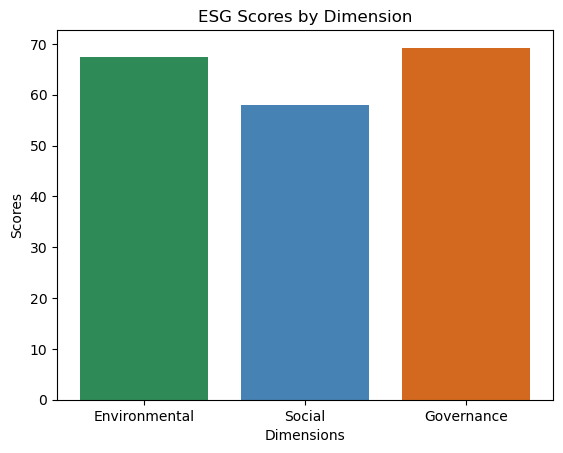

In [10]:
from jinja2 import Environment, FileSystemLoader
from datetime import date
import matplotlib.pyplot as plt
import base64
import io
data = {
    "company_name": "Sample Company",
    "upload_date": date.today().strftime("%Y-%m-%d"),
    "analysis_date": date.today().strftime("%Y-%m-%d"),
    "background": {
        "introduction": "focused on sustainable innovation in its industry..."
    },
    "highlights": {
        "strategy": "Company's multi-year strategy for sustainable growth...",
        "goals": [
            {"indicator": "Energy Efficiency", "value": 85, "industry_avg": 78, "summary": "Above industry average."},
            # Add more indicators as needed
        ]
    },
    "scores": {
        "environmental": environmental_score,  # Replace with actual scores
        "social": social_score,         # Replace with actual scores
        "governance": governance_score,     # Replace with actual scores
        "total": total_standardized_score,         # Replace with actual scores
        "industry_position_env": 80,  # Replace with actual scores
        "industry_position_soc": 75,  # Replace with actual scores
        "industry_position_gov": 70,  # Replace with actual scores
        "industry_position_total":80,  # Replace with actual scores
        "environmental_summary": "Good progress in environmental practices.",
        "social_summary": "Strong social initiatives.",
        "governance_summary": "Governance requires improvement.",
        "total_summary": "Good Performance in ESG"
    },
    "achievements_outlook": "Company's efforts align with upcoming regulatory trends...",
    "highest_rated_dimension": "Environmental",
    "lowest_rated_dimension": "Governance",
    "contact_info": "contact@sustainex.com"
}

# Define thresholds and summaries based on scores
def update_industry_position_and_summary(data):
    # Environmental position and summary
    if data["scores"]["environmental"] > 70:
        data["industry_position_env"] = "Top 10%"
        data["environmental_summary"] = "Strong in emissions reduction."
    elif 40 < data["scores"]["environmental"] <= 70:
        data["industry_position_env"] = "Median"
        data["environmental_summary"] = "Average in emissions reduction."
    else:
        data["industry_position_env"] = "Below Median"
        data["environmental_summary"] = "Needs improvement in emissions reduction."
    
    # Social position and summary
    if data["scores"]["social"] > 70:
        data["industry_position_soc"] = "Top 10%"
        data["social_summary"] = "Strong in labor standards."
    elif 40 < data["scores"]["social"] <= 70:
        data["industry_position_soc"] = "Median"
        data["social_summary"] = "Average on labor standards."
    else:
        data["industry_position_soc"] = "Below Median"
        data["social_summary"] = "Needs improvement in labor standards."
    
    # Governance position and summary
    if data["scores"]["governance"] > 70:
        data["industry_position_gov"] = "Top 10%"
        data["governance_summary"] = "Strong in transparency."
    elif 40 < data["scores"]["governance"] <= 70:
        data["industry_position_gov"] = "Median"
        data["governance_summary"] = "Average on transparency."
    else:
        data["industry_position_gov"] = "Below Median"
        data["governance_summary"] = "Needs improvement in transparency."
        
    # Total position and summary
    if data["scores"]["total"] > 70:
        data["industry_position_total"] = "Top 10%"
        data["total_summary"] = "Good Performance in ESG"
    elif 40 < data["scores"]["total"] <= 70:
        data["industry_position_total"] = "Median"
        data["total_summary"] = "Average Performance in ESG"
    else:
        data["industry_position_total"] = "Below Median"
        data["total_summary"] = "Needs improvement in ESG."

# Call the function to update the data dictionary
update_industry_position_and_summary(data)

# Print the updated data dictionary to verify the updates
print(data)

data.update({
    "company_name": df['Company Report Name'].iloc[1],
    "upload_date": date.today().strftime("%Y-%m-%d"),
    "analysis_date": date.today().strftime("%Y-%m-%d"),
    "background": {
        "introduction": "focused on sustainable innovation in its industry...",
    },
    "highlights": {
        "strategy": "Company's multi-year strategy for sustainable growth...",
        "goals": [
            {"indicator": "Energy Efficiency", "value": 85, "industry_avg": 78, "summary": "Above industry average."},
            # Additional indicators here
        ]
    },
    "scores": {
        "environmental": data["scores"]["environmental"],
        "social": data["scores"]["social"],
        "governance": data["scores"]["governance"],
        "total": data["scores"]["total"],
        "industry_position_env": data["industry_position_env"],
        "industry_position_soc": data["industry_position_soc"],
        "industry_position_gov": data["industry_position_gov"],
        "industry_position_total": data["industry_position_total"],
        "environmental_summary": data["environmental_summary"],
        "social_summary": data["social_summary"],
        "governance_summary": data["governance_summary"],
        "total_summary": data["total_summary"]
    },
    "achievements_outlook": "Company's efforts align with upcoming regulatory trends...",
    "highest_rated_dimension": highest_rated_dimension,
    "lowest_rated_dimension": lowest_rated_dimension,
    "contact_info": "contact@sustainex.com"
}  
) 

# Determine which summary to use based on the total score
high_score_summary_authority = (
    f"In conclusion, {data['company_name']} demonstrates strong ESG compliance, especially excelling in {data['highest_rated_dimension']}. "
    f"This level of performance highlights the company's proactive approach to meeting regulatory standards, aligning with best practices. "
    f"While minor enhancements could be made in {data['lowest_rated_dimension']}, the overall compliance is robust and meets expectations from regulatory perspectives."
)

low_score_summary_authority = (
    f"{data['company_name']} has shown commitment to ESG standards with strengths in {data['highest_rated_dimension']}. However, performance in "
    f"{data['lowest_rated_dimension']} remains below regulatory benchmarks, indicating areas for improvement. Addressing these gaps would enhance compliance "
    f"and reduce associated risks, aligning the company more closely with current regulatory standards."
)

high_score_summary_corporate = (
    f"{data['company_name']} has integrated ESG principles successfully, achieving strong results, particularly in {data['highest_rated_dimension']}. "
    f"This reflects the company’s commitment to sustainable practices and regulatory adherence. We will continue to strengthen areas like {data['lowest_rated_dimension']} "
    f"to further align with our strategic objectives and ensure sustained growth."
)

low_score_summary_corporate = (
    f"{data['company_name']} has made substantial progress in {data['highest_rated_dimension']} but acknowledges that {data['lowest_rated_dimension']} requires additional focus. "
    f"Improving this area is essential for meeting our corporate sustainability goals and enhancing our position within the industry. Focused efforts here will contribute "
    f"significantly to long-term resilience."
)

high_score_summary_investor = (
    f"As an investment, {data['company_name']} demonstrates exceptional ESG performance, excelling in {data['highest_rated_dimension']}. "
    f"This robust approach to sustainability reduces long-term risk and offers value to investors. Further improvements in {data['lowest_rated_dimension']} present "
    f"opportunities for even greater impact, reinforcing {data['company_name']}'s appeal as a sustainable investment."
)

low_score_summary_investor = (
    f"{data['company_name']} shows strengths in {data['highest_rated_dimension']} but continues to face challenges in {data['lowest_rated_dimension']}. "
    f"Strategic improvements in this area are essential to meet ESG compliance and reduce potential risks, enhancing the company’s attractiveness as a sustainable investment. "
    f"With a focus on long-term ESG commitments, we aim to build investor confidence in our sustainability trajectory."
)

# Define the "Achievements and Outlook" templates for each perspective
achievements_outlook_templates = {
    "authority": {
        "achievements": (
            f"{data['company_name']} has made significant progress in aligning with ESG compliance standards. "
            f"The company's strong adherence to regulatory guidelines, especially in {data['highest_rated_dimension']}, "
            f"highlights its dedication to meeting authority expectations. By implementing structured policies "
            f"and protocols,{data['company_name']}has established a solid foundation for ongoing compliance and sustainable operations."
        
            f"Looking forward, {data['company_name']} plans to further enhance its performance by focusing on areas such as {data['lowest_rated_dimension']}. "
            f"These efforts will not only support its long-term growth but also improve alignment with evolving regulatory standards. "
            f"Authorities can expect a proactive approach to sustainable practices from {data['company_name']}, positioning it as a leader in regulatory "
            f"compliance within its industry."
        )
    },
    "corporate": {
        "achievements": (
            f"{data['company_name']} has successfully embedded ESG principles into its corporate strategy, achieving strong results particularly "
            f"in {data['highest_rated_dimension']}. These accomplishments demonstrate the company’s proactive commitment to corporate responsibility "
            f"and sustainable growth, as well as its capability to integrate sustainability with operational goals."
        
            f"Going forward, {data['company_name']} aims to advance its sustainability agenda by enhancing practices in {data['lowest_rated_dimension']}. "
            f"By prioritizing resource allocation and innovation in this area, {data['company_name']} expects to bolster its competitive edge while "
            f"achieving full alignment with ESG objectives. This commitment will ensure the company’s resilience and growth in an increasingly "
            f"sustainability-focused marketplace."
        )
    },
    "investor": {
        "achievements": (
            f"{data['company_name']} presents a compelling case for sustainable investment, particularly through its strong performance in "
            f"{data['highest_rated_dimension']}. This area of achievement indicates that {data['company_name']} is not only aware of ESG risks but is also "
            f"taking active steps to mitigate them, thereby reducing potential exposure and enhancing long-term value for investors."
    
            f"Investors can expect {data['company_name']} to continue prioritizing sustainability, with a particular focus on improvement in "
            f"{data['lowest_rated_dimension']}. Targeted efforts in this area will reinforce {data['company_name']}’s commitment to ESG principles, "
            f"paving the way for robust, sustainable growth. This forward-thinking approach is expected to create greater value and strengthen "
            f"investor confidence in the company’s future."
        )
    }
}

# Populate summaries conditionally based on the total score
data.update({
    "summary_authority": high_score_summary_authority if data["scores"]["total"] > 70 else low_score_summary_authority,
    "summary_corporate": high_score_summary_corporate if data["scores"]["total"] > 70 else low_score_summary_corporate,
    "summary_investor": high_score_summary_investor if data["scores"]["total"] > 70 else low_score_summary_investor,
    "achievements_outlook_authority": achievements_outlook_templates["authority"]["achievements"],
    "achievements_outlook_corporate": achievements_outlook_templates["corporate"]["achievements"],
    "achievements_outlook_investor": achievements_outlook_templates["investor"]["achievements"],
    
})
data["indicator_data"] = indicator_data
data["highlights"] = {"goals": indicator_data}
  
# Define data variables, including calculated scores and visualizations
# Extend data with additional fields after updating

# Example of creating a sample bar plot and converting it to base64
def create_bar_chart():
    fig, ax = plt.subplots()
    categories = ["Environmental", "Social", "Governance"]
    values = [data["scores"]["environmental"], data["scores"]["social"], data["scores"]["governance"]]
    ax.bar(categories, values, color=["#2e8b57", "#4682b4", "#d2691e"])
    ax.set_xlabel("Dimensions")
    ax.set_ylabel("Scores")
    ax.set_title("ESG Scores by Dimension")
    
    # Convert the plot to a base64 string
    img = io.BytesIO()
    fig.savefig(img, format='png')
    img.seek(0)
    img_base64 = base64.b64encode(img.getvalue()).decode("utf-8")
    return img_base64

# Add the base64 image data to the data dictionary
data["bar_chart_base64"] = create_bar_chart()

# Template paths for each role
templates = {
    "authority": "./template/template_authority.html",
    "corporate_executives": "./template/template_corporate_executives.html",
    "investor": "./template/template_investor.html"
}

# Environment setup
env = Environment(loader=FileSystemLoader('.'))

# Loop through each template and generate a report
for role, template_path in templates.items():
    template = env.get_template(template_path)
    html_content = template.render(data=data)
    
    # Save the rendered HTML to a file
    output_file = f"esg_report_for_{role}.html"
    with open(output_file, "w") as f:
        f.write(html_content)
    print(f"Generated report for {role}: {output_file}")
